<a href="https://colab.research.google.com/github/dianagu55/amazon-ecomerce-data-analysis/blob/main/Water_bottle_Amazon_E_commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
raw_df = pd.read_csv('Water Bottle Helium 10 Export.csv')

In [ ]:
raw_df.head()

,Display Order,Product Details,ASIN,URL,Image URL,Brand,Price $,Parent Level Sales,ASIN Sales,Recent Purchases,...,Size Tier,Fulfillment,Dimensions,Weight,ABA Most Clicked,Creation Date,Sponsored,Best Seller,Seller Age (mo),Seller
0,1.0,Hydracy Water Bottle with Time Marker -Large B...,B09NC1LKN9,https://www.amazon.com/dp/B09NC1LKN9?psc=1,https://m.media-amazon.com/images/I/713ICa9zoU...,Hydracy,24.99,"4,230",133,100,...,Large Standard-Size,FBA,11.46 x 3.50 x 3.54 in,0.75,NaN,"Mar 1, 2022",Sponsored Brand Video,No,39,Hydracy
1,2.0,"($) FineDine Triple Walled, Insulated Water Bo...",B08B1VTTB9,https://www.amazon.com/dp/B08B1VTTB9?psc=1,https://m.media-amazon.com/images/I/81B0lVyUeB...,FineDine,14.99,"5,725","2,176","2,000",...,Large Standard-Size,FBA,13.76 x 3.70 x 3.78 in,1.21,NaN,"May 26, 2020",Sponsored,No,61,YH-Goods
2,3.0,($) 22oz Stainless Steel Bottles with 3 Lids S...,B0BY2Q46LM,https://www.amazon.com/dp/B0BY2Q46LM?psc=1,https://m.media-amazon.com/images/I/715rb85BH1...,Konokyo,14.84,"15,818",486,400,...,Large Standard-Size,AMZ,14.21 x 3.19 x 3.43 in,1.15,NaN,"Feb 7, 2023",Sponsored,No,28,Amazon
3,4.0,($) Stanley IceFlow Flip Straw Tumbler with Ha...,B0CSF4BP1Y,https://www.amazon.com/dp/B0CSF4BP1Y?psc=1,https://m.media-amazon.com/images/I/612h2UTzGX...,STANLEY,30.00,"102,121","1,414",600,...,Large Standard-Size,FBA,8.94 x 3.94 x 6.38 in,1.15,NaN,"Jan 23, 2024",Sponsored,No,17,Amazon
4,5.0,($) BJPKPK Water Bottle With Straw 25oz Insula...,B0CWTX62VS,https://www.amazon.com/dp/B0CWTX62VS?psc=1,https://m.media-amazon.com/images/I/61x88oDUb0...,BJPKPK,13.84,"7,868",47,100,...,Large Standard-Size,AMZ,10.79 x 3.35 x 3.90 in,1.00,NaN,"Mar 24, 2025",Sponsored,No,3,Amazon


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Display Order          72 non-null     float64
 1   Product Details        72 non-null     object 
 2   ASIN                   72 non-null     object 
 3   URL                    72 non-null     object 
 4   Image URL              72 non-null     object 
 5   Brand                  72 non-null     object 
 6   Price  $               72 non-null     float64
 7   Parent Level Sales     72 non-null     object 
 8   ASIN Sales             72 non-null     object 
 9   Recent Purchases       67 non-null     object 
 10  Parent Level Revenue   72 non-null     object 
 11  ASIN Revenue           72 non-null     object 
 12  Title Char. Count      72 non-null     int64  
 13  BSR                    72 non-null     object 
 14  Seller Country/Region  61 non-null     object 
 15  Fees  $ 

In [ ]:
excluded_columns = ['Display Order', 'Image URL', 'Parent Level Sales','Parent Level Revenue','Dimensions','Weight','ABA Most Clicked','Creation Date']
filtered_df = raw_df.drop(columns=excluded_columns)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        72 non-null     object 
 1   ASIN                   72 non-null     object 
 2   URL                    72 non-null     object 
 3   Brand                  72 non-null     object 
 4   Price  $               72 non-null     float64
 5   ASIN Sales             72 non-null     object 
 6   Recent Purchases       67 non-null     object 
 7   ASIN Revenue           72 non-null     object 
 8   Title Char. Count      72 non-null     int64  
 9   BSR                    72 non-null     object 
 10  Seller Country/Region  61 non-null     object 
 11  Fees  $                71 non-null     float64
 12  Active Sellers         72 non-null     int64  
 13  Ratings                72 non-null     float64
 14  Review Count           72 non-null     object 
 15  Images  

In [ ]:
columns_to_convert = ['ASIN Sales', 'Recent Purchases', 'ASIN Revenue', 'BSR', 'Review Count', 'Review velocity']

for column in columns_to_convert:
  # Replace 'N/A' with np.nan (NaN represents null in pandas)
  filtered_df[column] = filtered_df[column].replace('N/A', np.nan)
  # Remove commas from the string values
  filtered_df[column] = filtered_df[column].astype(str).str.replace(',', '', regex=False)
  # Convert to float, coercing errors to NaN
  filtered_df[column] = pd.to_numeric(filtered_df[column], errors='coerce')

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        72 non-null     object 
 1   ASIN                   72 non-null     object 
 2   URL                    72 non-null     object 
 3   Brand                  72 non-null     object 
 4   Price  $               72 non-null     float64
 5   ASIN Sales             72 non-null     int64  
 6   Recent Purchases       67 non-null     float64
 7   ASIN Revenue           72 non-null     float64
 8   Title Char. Count      72 non-null     int64  
 9   BSR                    72 non-null     int64  
 10  Seller Country/Region  61 non-null     object 
 11  Fees  $                71 non-null     float64
 12  Active Sellers         72 non-null     int64  
 13  Ratings                72 non-null     float64
 14  Review Count           72 non-null     int64  
 15  Images  

In [ ]:
# Fill empty 'Category' with 'Unknown'
filtered_df['Category'].fillna('Unknown', inplace=True)

# Group by 'Category' and sum 'ASIN Revenue'
category_revenue = filtered_df.groupby('Category')['ASIN Revenue'].sum().reset_index()

# Print the result
category_revenue

/tmp/ipython-input-7-3398422629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['Category'].fillna('Unknown', inplace=True)


,Category,ASIN Revenue
0,Grocery & Gourmet Food,2572287.16
1,Kitchen & Dining,1614167.00
2,Sports & Outdoors,1329740.91


In [ ]:
filtered_df = filtered_df[filtered_df['Category'].isin(['Grocery & Gourmet Food', 'Kitchen & Dining'])]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2 to 71
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        30 non-null     object 
 1   ASIN                   30 non-null     object 
 2   URL                    30 non-null     object 
 3   Brand                  30 non-null     object 
 4   Price  $               30 non-null     float64
 5   ASIN Sales             30 non-null     int64  
 6   Recent Purchases       25 non-null     float64
 7   ASIN Revenue           30 non-null     float64
 8   Title Char. Count      30 non-null     int64  
 9   BSR                    30 non-null     int64  
 10  Seller Country/Region  27 non-null     object 
 11  Fees  $                29 non-null     float64
 12  Active Sellers         30 non-null     int64  
 13  Ratings                30 non-null     float64
 14  Review Count           30 non-null     int64  
 15  Images       

In [ ]:
filtered_df.describe()

,Price $,ASIN Sales,Recent Purchases,ASIN Revenue,Title Char. Count,BSR,Fees $,Active Sellers,Ratings,Review Count,Images,Review velocity,Seller Age (mo)
count,30.000000,30.000000,25.000000,3.000000e+01,30.000000,30.000000,29.000000,30.000000,30.000000,30.000000,30.000000,29.000000,30.000000
mean,22.439000,6408.100000,8932.000000,1.395485e+05,148.800000,3399.500000,10.455517,3.000000,4.576667,18574.966667,7.533333,1181.586207,51.533333
std,9.105088,12285.438522,16402.406328,2.599157e+05,36.997111,8781.179749,5.136556,3.750862,0.150134,23996.678525,1.716720,4339.055629,57.839095
min,3.390000,6.000000,100.000000,1.694100e+02,84.000000,1.000000,4.150000,1.000000,4.300000,141.000000,4.000000,7.000000,3.000000
25%,14.577500,81.750000,300.000000,1.359405e+03,116.500000,83.250000,7.920000,1.000000,4.425000,2267.000000,7.000000,69.000000,16.250000
50%,23.375000,644.500000,1000.000000,1.625324e+04,151.500000,418.500000,9.270000,1.000000,4.600000,5921.000000,7.000000,166.000000,26.500000
75%,28.117500,6028.500000,7000.000000,1.449826e+05,186.500000,1162.750000,11.200000,2.750000,4.700000,24763.750000,8.750000,273.000000,64.500000
max,39.990000,42760.000000,70000.000000,1.023061e+06,199.000000,40401.000000,25.700000,15.000000,4.800000,75766.000000,12.000000,23481.000000,235.000000


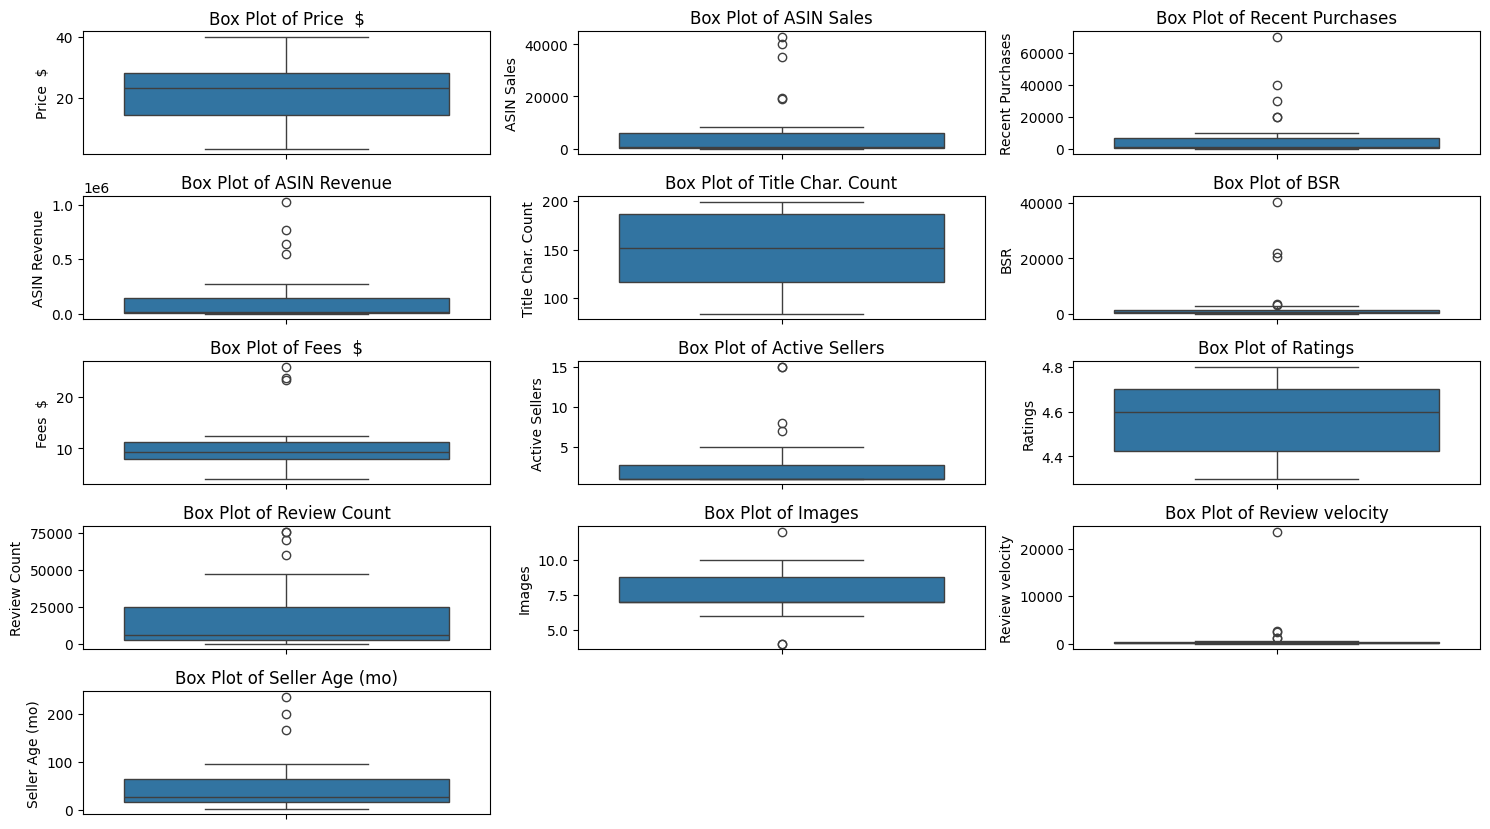

In [ ]:
# Select only numerical columns (float64 and int64)
numerical_cols = filtered_df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=filtered_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

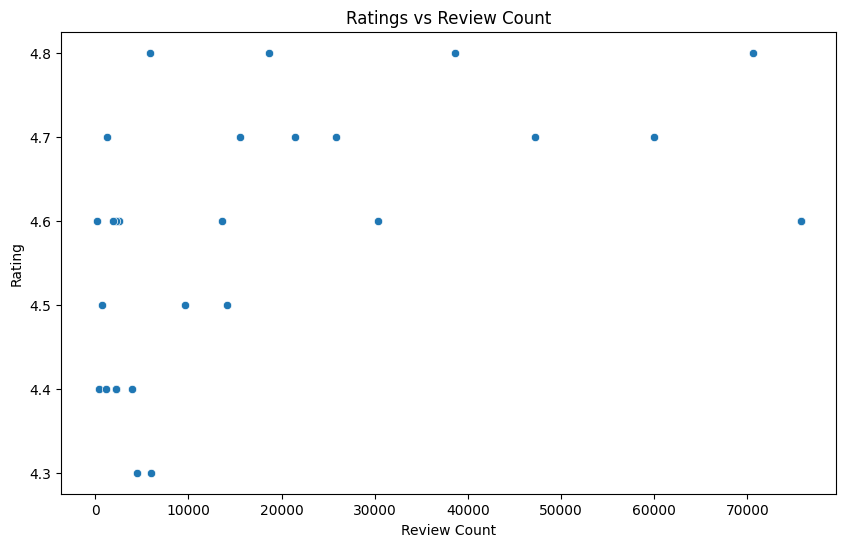

In [ ]:
# Scatter plot of Ratings vs Review Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Review Count', y='Ratings')
plt.title('Ratings vs Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

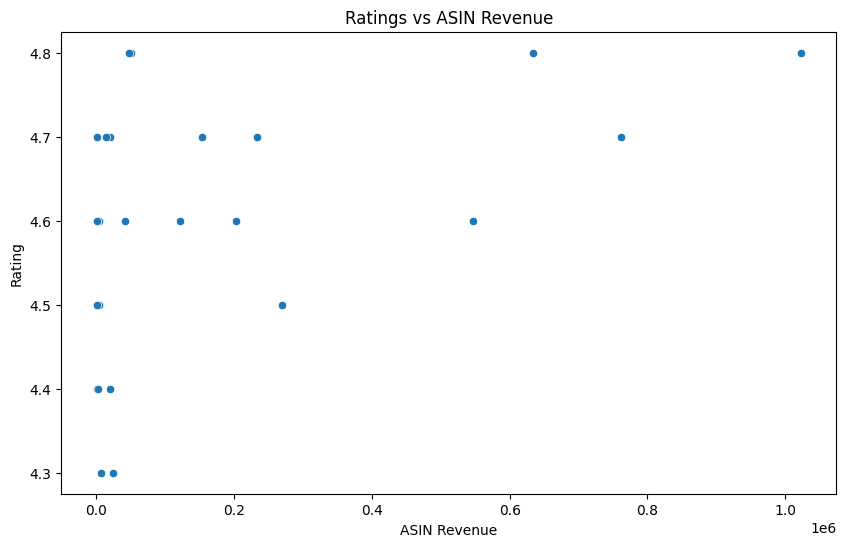

In [ ]:
# Scatter plot of Ratings vs ASIN Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='ASIN Revenue', y='Ratings')
plt.title('Ratings vs ASIN Revenue')
plt.xlabel('ASIN Revenue')
plt.ylabel('Rating')
plt.show()

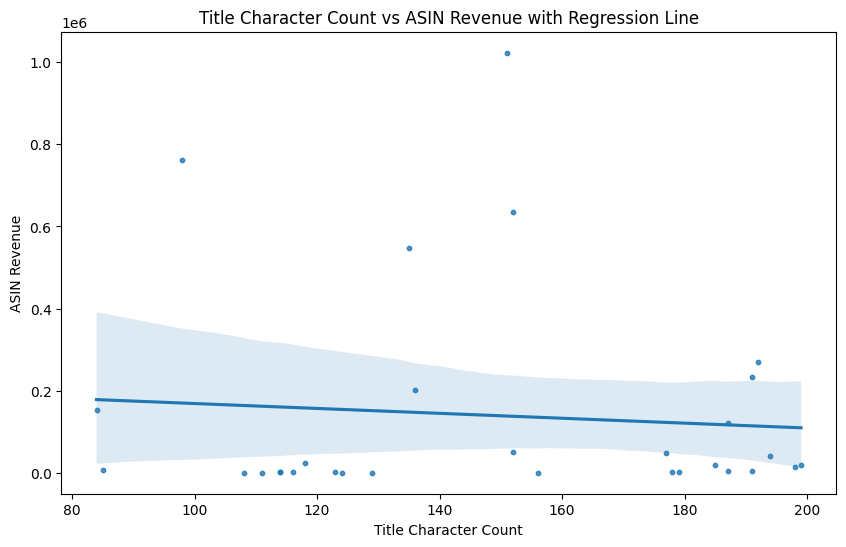

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_df, x='Title Char. Count', y='ASIN Revenue', scatter_kws={'s':10})
plt.title('Title Character Count vs ASIN Revenue with Regression Line')
plt.xlabel('Title Character Count')
plt.ylabel('ASIN Revenue')
plt.show()

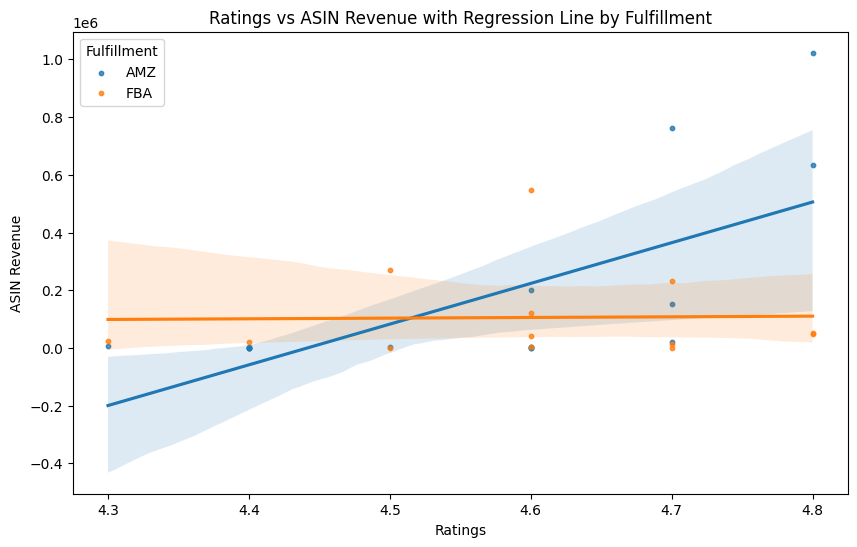

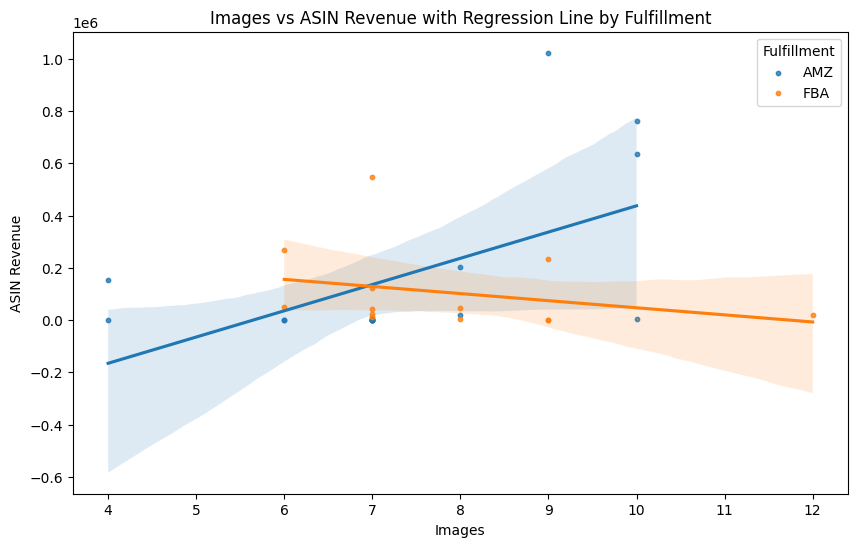

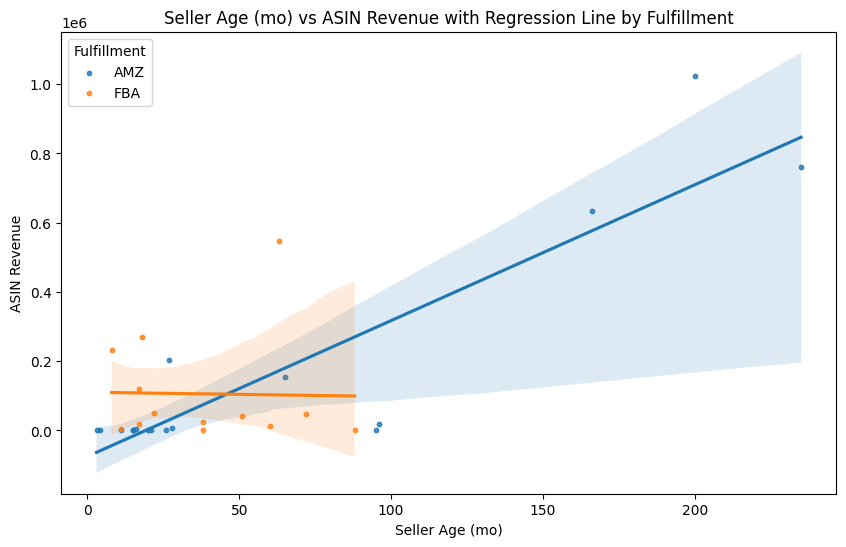

In [ ]:
# Define the x-axis variables
x_vars = ['Ratings', 'Images', 'Seller Age (mo)']
y_var = 'ASIN Revenue'
legend_var = 'Fulfillment'

# Create a loop to generate scatter plots with regression lines for each x-variable and fulfillment type
for x_var in x_vars:
    plt.figure(figsize=(10, 6))
    for fulfillment_type in filtered_df[legend_var].unique():
        subset_df = filtered_df[filtered_df[legend_var] == fulfillment_type]
        sns.regplot(data=subset_df, x=x_var, y=y_var, scatter_kws={'s':10}, label=fulfillment_type)

    plt.title(f'{x_var} vs {y_var} with Regression Line by {legend_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=legend_var)
    plt.show()

In [ ]:
filtered_df.to_csv('filtered_data.csv', index=False)